## Code: https://github.com/hunkim/PyTorchZeroToAll
## Slides: http://bit.ly/PyTorchZeroAll
## Videos: http://bit.ly/PyTorchVideo

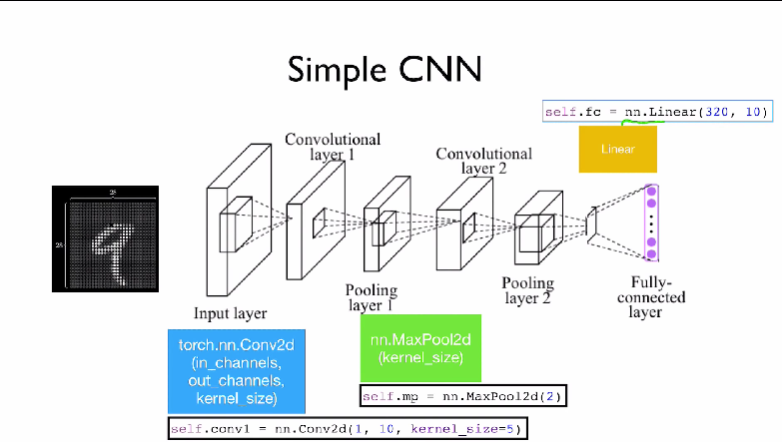

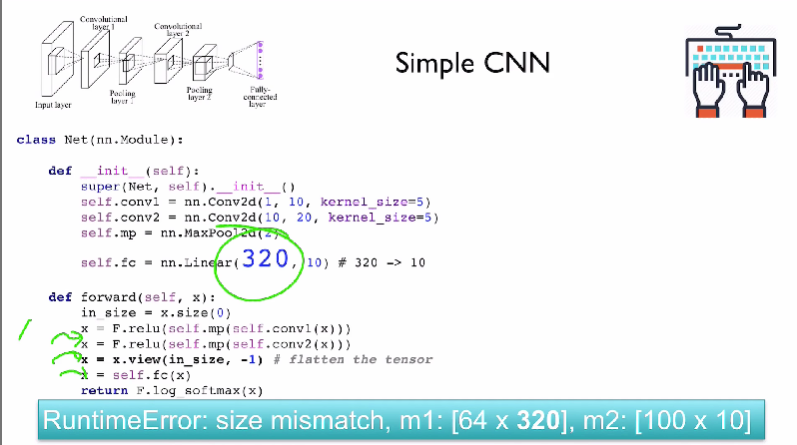

In [1]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



<ipython-input-1-1a93a6ee6531>:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299232
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.251736
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.273843
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.265502
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.216972
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.213825
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.158905
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.063906
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.004206
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.893542
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.651127
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.441290
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.148374
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.758534
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.857417
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.635640
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.527402
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.543277
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.587108
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.577376
Train Epoch: 1 [12800/60000 (

<ipython-input-1-1a93a6ee6531>:76: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.1801, Accuracy: 9453/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.199621
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.106028
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.138830
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.118247
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.139042
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.255176
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.195461
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.231218
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.168397
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.153239
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.217283
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.253881
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.146789
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.163016
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.136411
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.110352
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.133934
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.133760
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.328313
Train Epoch: 2 [12

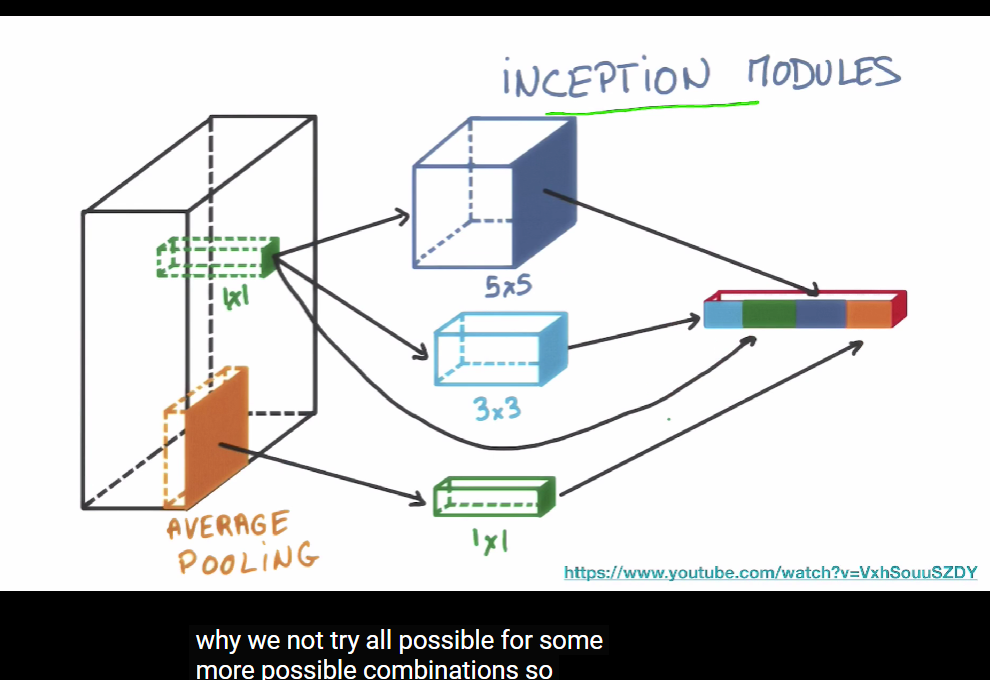

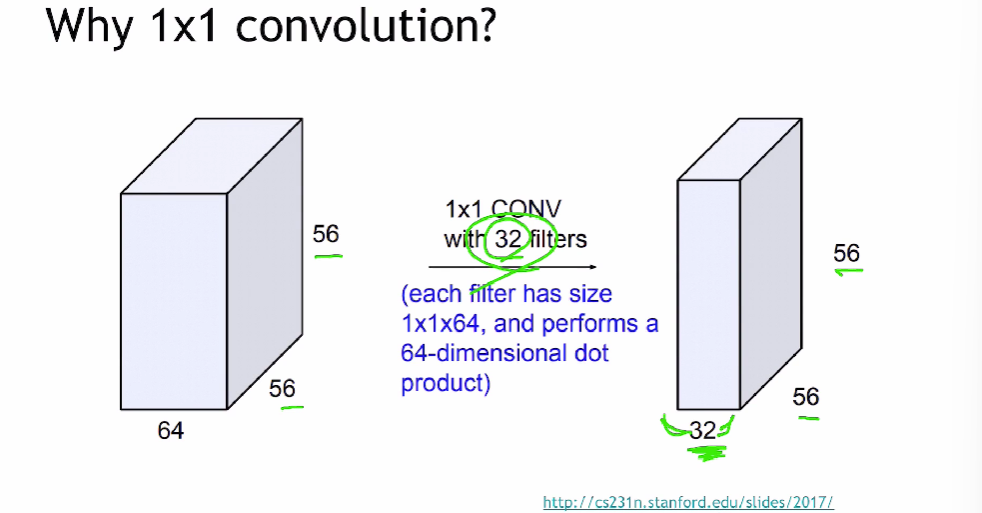

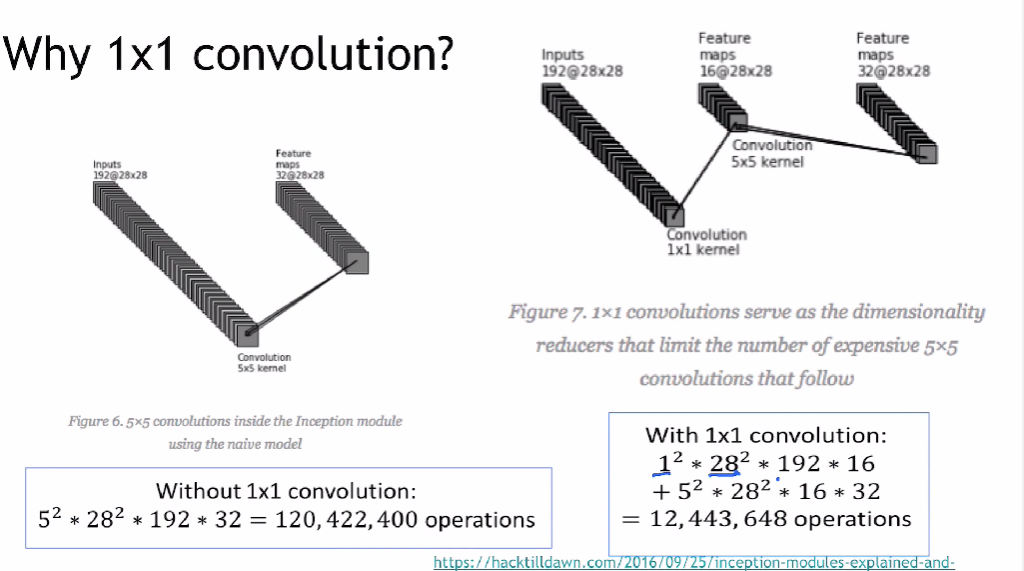

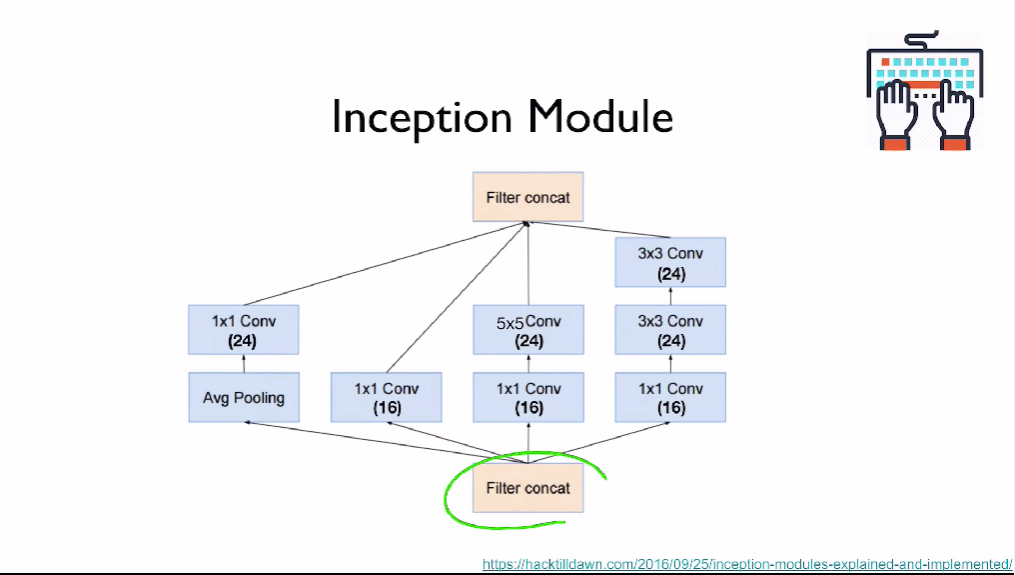

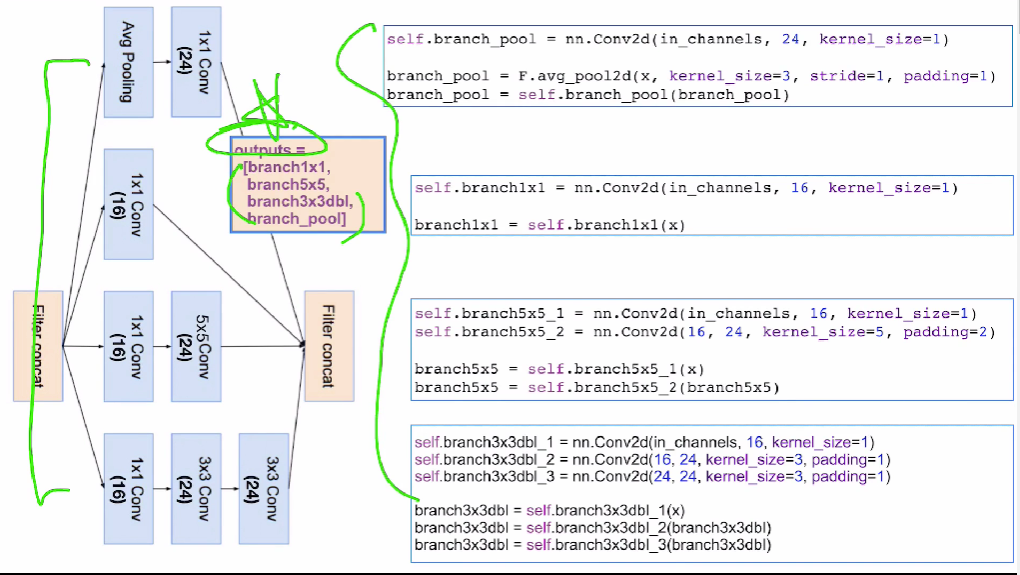

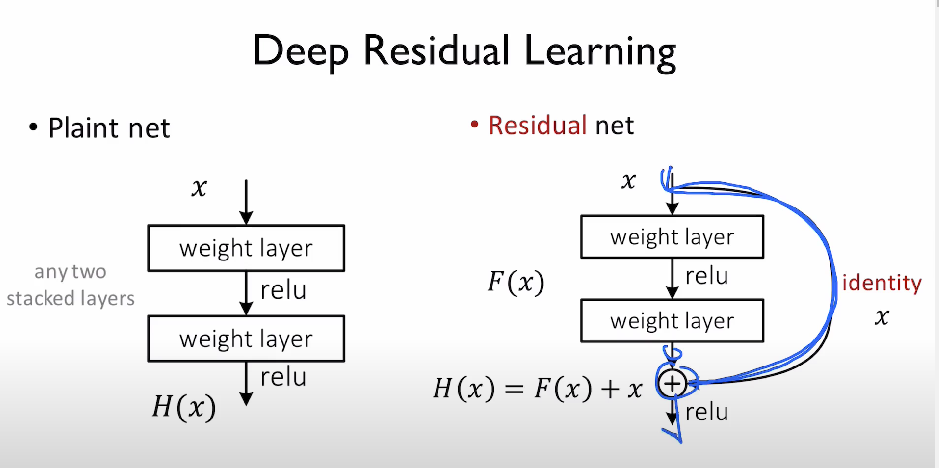

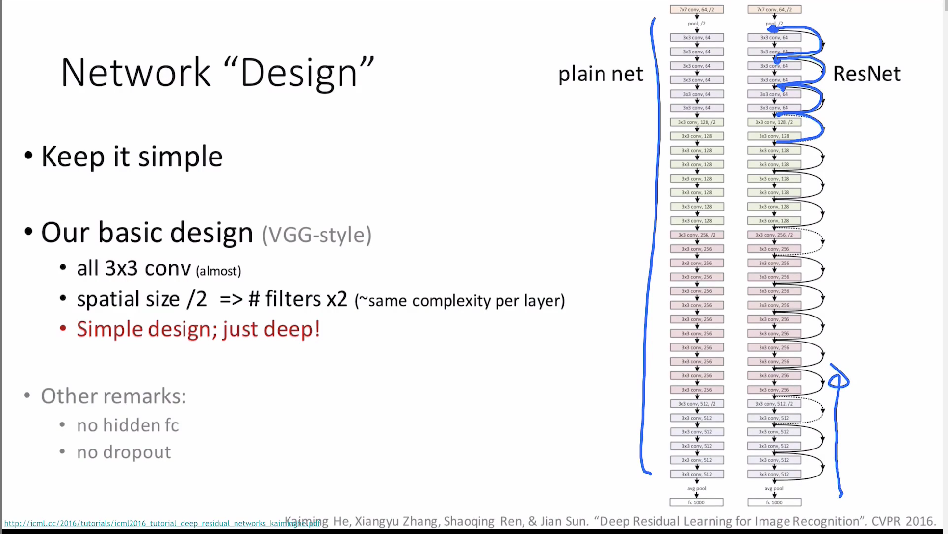

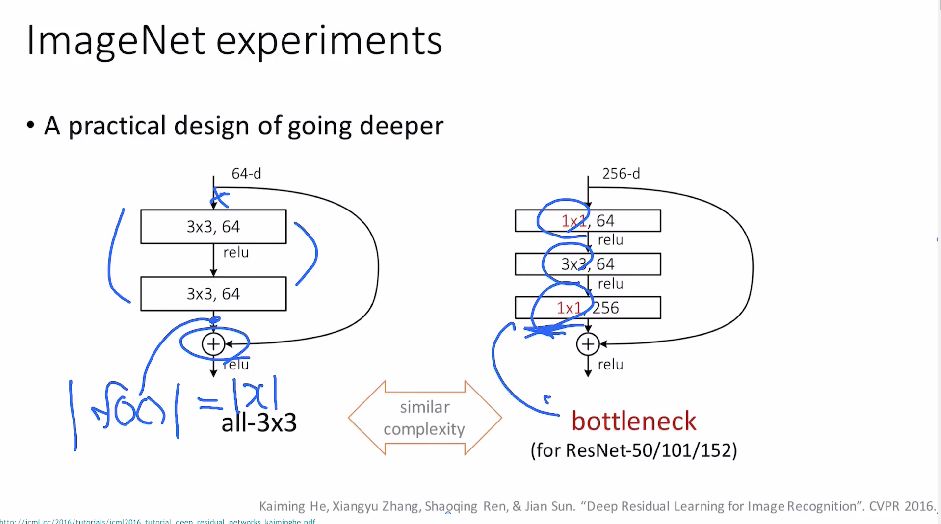

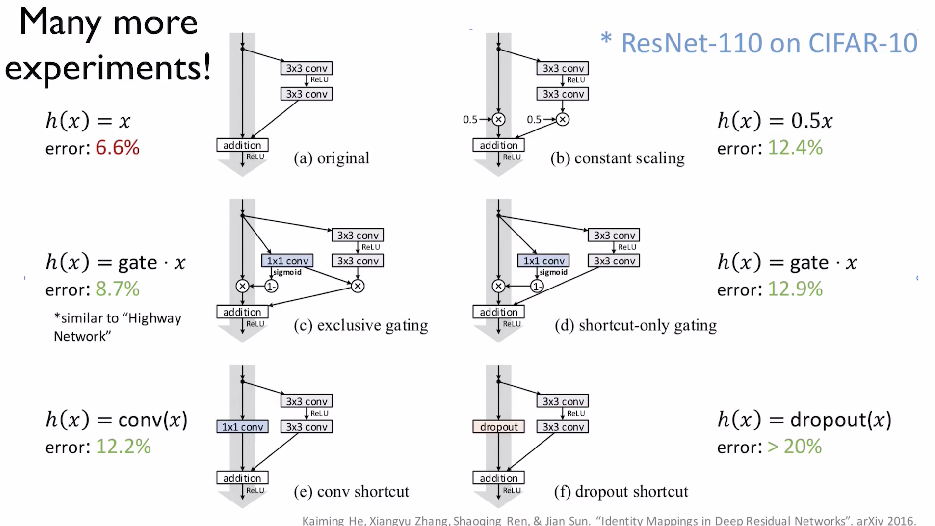

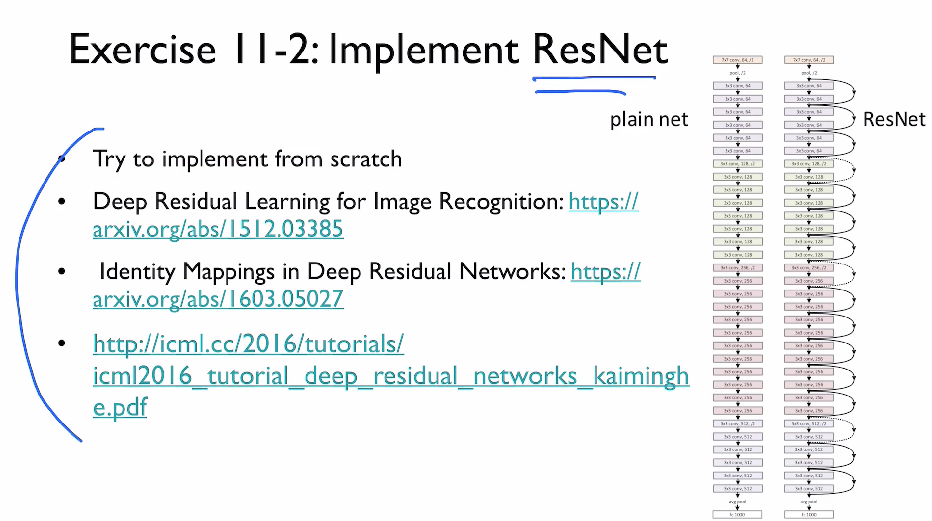

In [6]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class InceptionA(nn.Module):

    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)

        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(88, 20, kernel_size=5)

        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)

        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(1408, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()


<ipython-input-6-dfccc6e2d27a>:86: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300189
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.307469
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.295126
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.284983
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.294188
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.303844
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.297415
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.309357
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.303896
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.286717
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.298541
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.280382
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.268410
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.277421
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.234232
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.230686
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.179795
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.139382
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.107623
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.903477
Train Epoch: 1 [12800/60000 (

<ipython-input-6-dfccc6e2d27a>:114: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)



Test set: Average loss: 0.1530, Accuracy: 9530/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.086238
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.159002
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.088553
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.139149
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.147841
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.156403
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.191289
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.069977
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.204474
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.109422
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.172319
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.084479
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.118832
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.066593
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.047831
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.078020
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.070257
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.114891
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.205483
Train Epoch: 2 [12